# Tabular Montecarlo First Visit and Every Visit Implementation

In [2]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Create the environment
def create_env():
    #return gym.make('FrozenLake-v1', is_slippery=False)  # or True, depending on your use case
    return gym.make('FrozenLake-v1', is_slippery=True)

# Initialize Q-table
def initialize_q_table(env):
    number_of_states = env.observation_space.n
    number_of_actions = env.action_space.n
    return np.zeros((number_of_states, number_of_actions))

# Decay function for epsilon
def decay_function(episode, total_train_episodes, min_epsilon=0.01):
    return max(min_epsilon, min(1.0, 1.0 - np.log10((episode + 1) / (total_train_episodes * 0.1))))

# Choose action based on epsilon-greedy policy
def choose_action(q_table, state, epsilon, env):
    if np.random.random() <= epsilon:
        return env.action_space.sample()  # Exploration
    else:
        return np.argmax(q_table[state])  # Exploitation

# Generate an episode
def Generate_episode(epsilon, q_table, env, max_env_steps):
    state = env.reset()
    total_reward = 0
    done = False
    trajectory = []
    
    for step in range(max_env_steps):
        if isinstance(state, tuple):
            state = state[0]

        action = choose_action(q_table, state, epsilon, env)
        new_state, reward, done, info, _ = env.step(action)
        trajectory.append([state, action, reward])
        state = new_state
        total_reward += reward
        if done:
            break
    
    return trajectory, total_reward

# Monte Carlo algorithm first visit version
def Monte_Carlo_First_Visit(env, total_train_episodes, gamma, max_epsilon, min_epsilon):
    q_table = initialize_q_table(env)
    visits_counter = np.zeros_like(q_table)
    rewards = []
    
    max_env_steps = env.spec.max_episode_steps
    
    for episode in range(total_train_episodes):
        epsilon = decay_function(episode, total_train_episodes, min_epsilon)
        trajectory, total_reward = Generate_episode(epsilon, q_table, env, max_env_steps)
        G = 0
        
        for t in reversed(range(len(trajectory))):
            state, action, reward = trajectory[t]
            G = gamma * G + reward
            
            # Convert state to integer if it's a dictionary
            if isinstance(state, dict):
                state = state.get('state_key', 0)  # Adjust 'state_key' to the appropriate key in your dictionary
            
            # first-visit MC
            if not [state, action] in [[x[0], x[1]] for x in trajectory[0:t]]:
                
                if isinstance(state, tuple):
                    state = state[0]  # Adjust for your state representation
                                    
                visits_counter[state, action] += 1
                q_table[state, action] += (G - q_table[state, action]) / visits_counter[state, action]
        
        if episode % 1000 == 0:
            rewards.append(total_reward)
            print(f"Episode {episode}, epsilon {epsilon:.4f}, reward {total_reward:.2f}")
    
    rewards.append(total_reward)
    print(f"Episode {episode}, epsilon {epsilon:.4f}, reward {total_reward:.2f}")
    return q_table, rewards

# Monte Carlo algorithm - Every Visit Version
def Monte_Carlo_Every_Visit(env, total_train_episodes, gamma, max_epsilon, min_epsilon):
    q_table = initialize_q_table(env)
    visits_counter = np.zeros_like(q_table)
    rewards = []
    
    max_env_steps = env.spec.max_episode_steps
    
    for episode in range(total_train_episodes):
        epsilon = decay_function(episode, total_train_episodes, min_epsilon)
        trajectory, total_reward = Generate_episode(epsilon, q_table, env, max_env_steps)
        G = 0
        
        for t in reversed(range(len(trajectory))):
            state, action, reward = trajectory[t]
            G = gamma * G + reward
            
            if isinstance(state, dict):
                state = state.get('state_key', 0)  # Adjust 'state_key' to the appropriate key in your dictionary
            
            if isinstance(state, tuple):
                state = state[0]  # Adjust for your state representation

            # every-visit MC    
            visits_counter[state, action] += 1
            q_table[state, action] += (G - q_table[state, action]) / visits_counter[state, action]
        
        if episode % 50 == 0:
            rewards.append(total_reward)
            print(f"Episode {episode}, epsilon {epsilon:.4f}, reward {total_reward:.2f}")
            
    print(f"Episode {episode}, epsilon {epsilon:.4f}, reward {total_reward:.2f}")
    return q_table, rewards


# Plotting the training rewards
def plot_rewards(rewards, title, save_path):
    x = np.linspace(0, len(rewards) * 50, len(rewards))
    plt.plot(x, rewards, label='Monte Carlo')
    plt.title(title)
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    plt.legend()
    plt.savefig(save_path)
    plt.show()

# Testing the policy
def test_policy(env, q_table, num_episodes=10):
    rewards = []
    max_env_steps = env.spec.max_episode_steps
    
    for episode in range(num_episodes):
        state = env.reset()
        total_rewards = 0
        done = False
        
        for step in range(max_env_steps):
            if isinstance(state, tuple):
                state = state[0]

            action = np.argmax(q_table[state])
            state, reward, done, info, _ = env.step(action)
            total_rewards += reward
            env.render()
            if done:
                env.render()
                break
        
        rewards.append(total_rewards)
        print(f"Episode {episode}, reward {total_rewards}")
    
    print(f"Average score: {np.mean(rewards)}")


    


# First Visit Training and Testing 


 ********** Training number 0
Episode 0, epsilon 1.0000, reward 0.00
Episode 1000, epsilon 1.0000, reward 0.00
Episode 2000, epsilon 1.0000, reward 0.00
Episode 3000, epsilon 1.0000, reward 0.00
Episode 4000, epsilon 1.0000, reward 0.00
Episode 5000, epsilon 0.9999, reward 0.00
Episode 6000, epsilon 0.9207, reward 0.00
Episode 7000, epsilon 0.8538, reward 0.00
Episode 8000, epsilon 0.7958, reward 0.00
Episode 9000, epsilon 0.7447, reward 0.00
Episode 10000, epsilon 0.6989, reward 0.00
Episode 11000, epsilon 0.6575, reward 0.00
Episode 12000, epsilon 0.6198, reward 0.00
Episode 13000, epsilon 0.5850, reward 0.00
Episode 14000, epsilon 0.5528, reward 0.00
Episode 15000, epsilon 0.5228, reward 0.00
Episode 16000, epsilon 0.4948, reward 0.00
Episode 17000, epsilon 0.4685, reward 0.00
Episode 18000, epsilon 0.4437, reward 0.00
Episode 19000, epsilon 0.4202, reward 0.00
Episode 20000, epsilon 0.3979, reward 0.00
Episode 21000, epsilon 0.3767, reward 0.00
Episode 22000, epsilon 0.3565, rewar

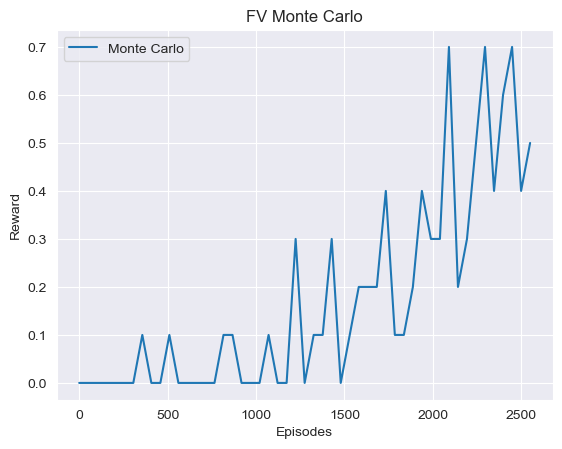

Episode 0, reward 0.0
Average score: 0.0


In [3]:
# Main code
if __name__ == "__main__":
    n_times = 10 #10 if is_slippery=True
    total_train_episodes = 50000 #50000 if is_slippery=True
    gamma = 0.99
    max_epsilon = 1.0
    min_epsilon = 0.01

    env = create_env()

    MC_tables = []
    MC_rewards = []

    for number in range(n_times):
        print(f"\n ********** Training number {number}")
        q_table, rewards = Monte_Carlo_First_Visit(env, total_train_episodes, gamma, max_epsilon, min_epsilon)
        MC_tables.append(q_table)
        MC_rewards.append(rewards)

    # we perform the mean of the rewards and the Q-tables to reduce variance
    MC_mean = np.mean(np.array(MC_rewards), axis=0)
    MC_mean_table = np.mean(np.array(MC_tables), axis=0)
    #Prima erano:
    #np.save('ON/imgs/MC_mean_FV.npy', MC_mean)
    #np.save('ON/models/MC_tables_FV.npy', MC_mean_table)
    #Ora sono:
    #np.save('ON/imgs/FV_MC_TAB_mean.npy', MC_mean)
    #np.save('ON/models/FV_MC_TAB_tables.npy', MC_mean_table)
    np.save('ON/imgs/FV_MC_IS_TAB_mean.npy', MC_mean)
    np.save('ON/models/FV_MC_IS_TAB_tables.npy', MC_mean_table)

    #plot_rewards(MC_mean, 'FV Monte Carlo', 'ON/imgs/FV_TAB_rewards.png')
    plot_rewards(MC_mean, 'FV Monte Carlo', 'ON/imgs/FV_IS_TAB_rewards.png')

    # Load Q-tables and test
    q_table = np.load('ON/models/FV_MC_IS_TAB_tables.npy', allow_pickle=True)
    #q_table = q_tables[0]
    #env = gym.make('FrozenLake-v1', is_slippery=False, render_mode="human")
    env = gym.make('FrozenLake-v1', is_slippery=True, render_mode="human")
    test_policy(env, q_table, num_episodes=1)
    
    env.close()


# Every Visit Training and Testing


 ********** Training number 0
Episode 0, epsilon 1.0000, reward 0.00
Episode 999, epsilon 0.0100, reward 0.00

 ********** Training number 1
Episode 0, epsilon 1.0000, reward 0.00
Episode 999, epsilon 0.0100, reward 1.00

 ********** Training number 2
Episode 0, epsilon 1.0000, reward 0.00
Episode 999, epsilon 0.0100, reward 0.00

 ********** Training number 3
Episode 0, epsilon 1.0000, reward 0.00
Episode 999, epsilon 0.0100, reward 0.00

 ********** Training number 4
Episode 0, epsilon 1.0000, reward 0.00
Episode 999, epsilon 0.0100, reward 0.00


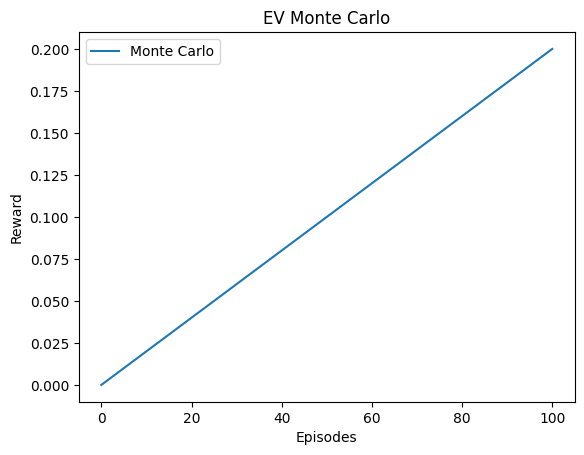

Episode 0, reward 0.0
Average score: 0.0


In [4]:
# Main code
if __name__ == "__main__":
    n_times = 5
    total_train_episodes = 1000
    gamma = 0.99
    max_epsilon = 1.0
    min_epsilon = 0.01

    env = create_env()

    MC_tables = []
    MC_rewards = []

    for number in range(n_times):
        print(f"\n ********** Training number {number}")
        q_table, rewards = Monte_Carlo_Every_Visit(env, total_train_episodes, gamma, max_epsilon, min_epsilon)
        MC_tables.append(q_table)
        MC_rewards.append(rewards)

    MC_mean = np.mean(np.array(MC_rewards), axis=0)
    MC_mean_tables = np.mean(np.array(MC_tables), axis=0)
    np.save('ON/models/MC_mean_EV.npy', MC_mean)
    np.save('ON/models/MC_tables_EV.npy', MC_mean_tables)

    plot_rewards(MC_mean, 'EV Monte Carlo', 'ON/imgs/EV_rewards.png')

    # Load Q-tables and test
    q_table = np.load('ON/models/MC_tables_EV.npy', allow_pickle=True)
    env = gym.make('FrozenLake-v1', is_slippery=False, render_mode="human")
    test_policy(env, q_table, num_episodes=1)
    
    env.close()


# Policy Plot

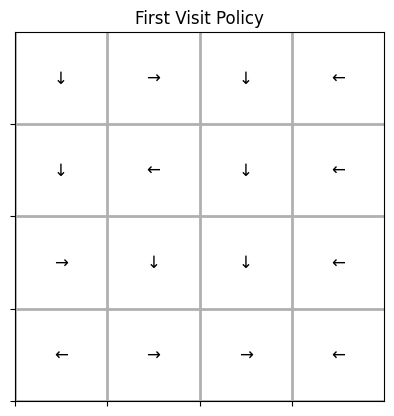

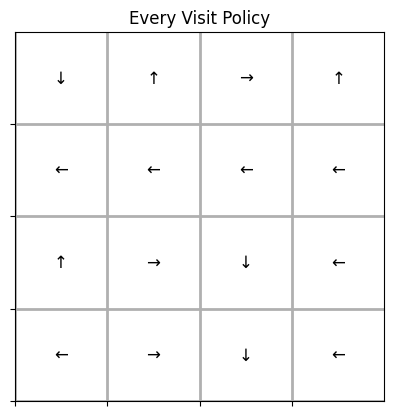

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_policy(q_table, grid_size=(4, 4), title='Policy', save_path=None):
    """
    Plots the policy learned by the Q-table on a grid using text labels for directions.

    Parameters:
        q_table (numpy.ndarray): The Q-table from which to derive the policy.
        grid_size (tuple): The size of the grid representing the environment (default is (4, 4)).
    """
    # Define direction labels
    direction_labels = {
        0: '←',  # left
        1: '↓',  # down
        2: '→',  # right
        3: '↑'   # up
    }

   
    policy = np.argmax(q_table, axis=1).reshape(grid_size)
    
    # Set up the grid
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(grid_size[1]))
    ax.set_yticks(np.arange(grid_size[0]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # Create grid
    ax.grid(which='both', linestyle='-', linewidth=2)
    
    # Plot direction labels
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            action = policy[i, j]
            direction = direction_labels[action]
            ax.text(j + 0.5, grid_size[0] - i - 0.5, direction, 
                    ha='center', va='center', fontsize=12, color='black')

    # Set the aspect of the plot to equal
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.set_xlim(0, grid_size[1])
    ax.set_ylim(0, grid_size[0])
    plt.savefig(save_path)
    plt.show()

# Usage example:
if __name__ == "__main__":
    # Assuming you have already saved your Q-tables as 'MC_tables.npy'
    FV_q_table = np.load('ON/models/MC_tables_FV.npy', allow_pickle=True)
    EV_q_table = np.load('ON/models/MC_tables_EV.npy', allow_pickle=True)
    
    plot_policy(FV_q_table, title='First Visit Policy', save_path='ON/imgs/FV_policy.png')
    plot_policy(EV_q_table, title='Every Visit Policy', save_path='ON/imgs/EV_policy.png')


# Codice sistemato

In [30]:
#CODICE SISTEMATO
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Create the environment
def create_env(slippery):
    return gym.make('FrozenLake-v1', is_slippery=slippery)

# Initialize Q-table
def initialize_q_table(env):
    number_of_states = env.observation_space.n
    number_of_actions = env.action_space.n
    return np.zeros((number_of_states, number_of_actions))

# Decay function for epsilon
def decay_function(episode, total_train_episodes, min_epsilon=0.01):
    return max(min_epsilon, min(1.0, 1.0 - np.log10((episode + 1) / (total_train_episodes * 0.1))))

# Choose action based on epsilon-greedy policy
def choose_action(q_table, state, epsilon, env):
    if np.random.random() <= epsilon:
        return env.action_space.sample()  # Exploration
    else:
        return np.argmax(q_table[state])  # Exploitation

# Generate an episode
def Generate_episode(epsilon, q_table, env, max_env_steps):
    state = env.reset()
    total_reward = 0
    done = False
    trajectory = []
    
    for step in range(max_env_steps):
        if isinstance(state, tuple):
            state = state[0]

        action = choose_action(q_table, state, epsilon, env)
        new_state, reward, done, info, _ = env.step(action)
        trajectory.append([state, action, reward])
        state = new_state
        total_reward += reward
        if done:
            break
    
    return trajectory, total_reward

# Monte Carlo algorithm - Every Visit Version
def Monte_Carlo(env, total_train_episodes, gamma, max_epsilon, min_epsilon, first_visit):
    q_table = initialize_q_table(env)
    visits_counter = np.zeros_like(q_table)
    rewards = []
    
    max_env_steps = env.spec.max_episode_steps
    
    for episode in range(total_train_episodes):
        epsilon = decay_function(episode, total_train_episodes, min_epsilon)
        trajectory, total_reward = Generate_episode(epsilon, q_table, env, max_env_steps)
        G = 0
        
        for t in reversed(range(len(trajectory))):
            state, action, reward = trajectory[t]
            G = gamma * G + reward
            
            if isinstance(state, dict):
                state = state.get('state_key', 0)  # Adjust 'state_key' to the appropriate key in your dictionary
            
            if isinstance(state, tuple):
                state = state[0]  # Adjust for your state representation

            # every-visit MC    
            visits_counter[state, action] += 1
            if(first_visit):
                if not [state, action] in [[x[0], x[1]] for x in trajectory[0:t]]:
                    q_table[state, action] += (G - q_table[state, action]) / visits_counter[state, action]
            else:
                q_table[state, action] += (G - q_table[state, action]) / visits_counter[state, action]
        
        if episode % 100 == 0:
            rewards.append(total_reward)
            print(f"Episode {episode}, epsilon {epsilon:.4f}, reward {total_reward:.2f}")
    
    #rewards.append(total_reward)    
    print(f"Episode {episode}, epsilon {epsilon:.4f}, reward {total_reward:.2f}")
    return q_table, rewards


# Plotting the training rewards
def plot_rewards(rewards, title, save_path):
    x = np.linspace(0, len(rewards) * 50, len(rewards))
    plt.plot(x, rewards, label='Monte Carlo')
    plt.title(title)
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    plt.legend()
    plt.savefig(save_path)
    plt.show()

# Testing the policy
def test_policy(env, q_table, num_episodes):
    rewards = []
    max_env_steps = env.spec.max_episode_steps
    
    for episode in range(num_episodes):
        state = env.reset()
        total_rewards = 0
        done = False
        
        for step in range(max_env_steps):
            if isinstance(state, tuple):
                state = state[0]

            action = np.argmax(q_table[state])
            state, reward, done, info, _ = env.step(action)
            total_rewards += reward
            env.render()
            if done:
                env.render()
                break
        
        rewards.append(total_rewards)
        print(f"Episode {episode}, reward {total_rewards}")
    
    print(f"Average score: {np.mean(rewards)}")


 ********** Training number 0
Episode 0, epsilon 1.0000, reward 0.00
Episode 100, epsilon 0.9957, reward 0.00
Episode 200, epsilon 0.6968, reward 0.00
Episode 300, epsilon 0.5214, reward 0.00
Episode 400, epsilon 0.3969, reward 1.00
Episode 500, epsilon 0.3002, reward 0.00
Episode 600, epsilon 0.2211, reward 1.00
Episode 700, epsilon 0.1543, reward 1.00
Episode 800, epsilon 0.0964, reward 1.00
Episode 900, epsilon 0.0453, reward 1.00
Episode 999, epsilon 0.0100, reward 1.00

 ********** Q TABLE [[0.1513644  0.54768643 0.16667767 0.09874166]
 [0.10346439 0.         0.26012252 0.10444505]
 [0.12622452 0.33853054 0.04258058 0.05380973]
 [0.0613573  0.         0.         0.02881788]
 [0.21911499 0.6476781  0.         0.22181105]
 [0.         0.         0.         0.        ]
 [0.         0.60170361 0.         0.09510381]
 [0.         0.         0.         0.        ]
 [0.30821252 0.         0.7743378  0.2317709 ]
 [0.34576542 0.8711544  0.6220123  0.        ]
 [0.36426028 0.89304943 0.   

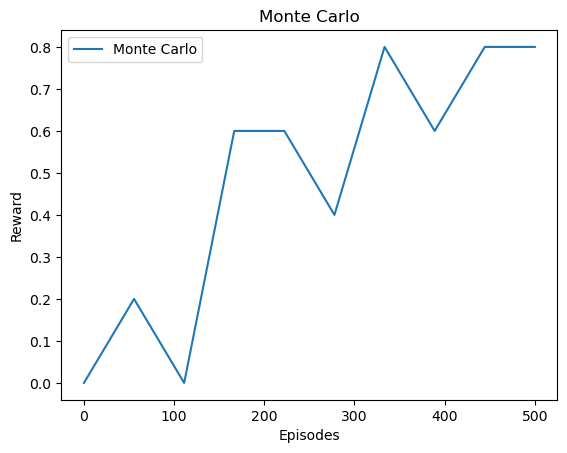

Episode 0, reward 1.0
Episode 1, reward 1.0
Episode 2, reward 1.0
Episode 3, reward 1.0
Episode 4, reward 1.0
Average score: 1.0


In [31]:
# Main code
if __name__ == "__main__":
    n_times = 5 #10 if is_slippery=True
    total_train_episodes = 1000 #50000 if is_slippery=True
    gamma = 0.99
    max_epsilon = 1.0
    min_epsilon = 0.01
    slippery = False
    first_visit = True
    MC_tables = []
    MC_rewards = []
    env = create_env(slippery)

    for number in range(n_times):
        print(f"\n ********** Training number {number}")
        q_table, rewards = Monte_Carlo(env, total_train_episodes, gamma, max_epsilon, min_epsilon, first_visit)
        print(f"\n ********** Q TABLE {q_table} ********** \n")
        print(f"\n ********** REWS {rewards} ********** \n")
        MC_tables.append(q_table)
        MC_rewards.append(rewards)

    # we perform the mean of the rewards and the Q-tables to reduce variance
    MC_mean = np.mean(np.array(MC_rewards), axis=0)
    MC_mean_table = np.mean(np.array(MC_tables), axis=0)
    save_path_rw = 'ON/imgs/results_MC_ON_TAB_rw.png'  # Adding .npy to this path
    save_path_mc = 'ON/models/table_MC_ON_TAB.npy'
    
    np.save(save_path_rw, MC_mean)  # Save the mean rewards
    np.save(save_path_mc, MC_mean_table)  # Save the mean Q-table
    
    plot_rewards(MC_mean, 'Monte Carlo', save_path_rw)
    
    # Load Q-tables and test
    q_table = np.load(save_path_mc, allow_pickle=True)
    env = gym.make('FrozenLake-v1', is_slippery=slippery, render_mode="human")
    test_policy(env, q_table, num_episodes=n_times)
    env.close()


# Codice con controllo sulla convergenza

In [14]:
#CODICE SISTEMATO
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Create the environment
def create_env(slippery):
    return gym.make('FrozenLake-v1', is_slippery=slippery)

# Initialize Q-table
def initialize_q_table(env):
    number_of_states = env.observation_space.n
    number_of_actions = env.action_space.n
    return np.zeros((number_of_states, number_of_actions))

# Decay function for epsilon
def decay_function(episode, total_train_episodes, min_epsilon=0.01):
    return max(min_epsilon, min(1.0, 1.0 - np.log10((episode + 1) / (total_train_episodes * 0.1))))

# Choose action based on epsilon-greedy policy
def choose_action(q_table, state, epsilon, env):
    if np.random.random() <= epsilon:
        return env.action_space.sample()  # Exploration
    else:
        return np.argmax(q_table[state])  # Exploitation

# Generate an episode
def Generate_episode(epsilon, q_table, env, max_env_steps):
    state = env.reset()
    total_reward = 0
    done = False
    trajectory = []
    
    for step in range(max_env_steps):
        if isinstance(state, tuple):
            state = state[0]

        action = choose_action(q_table, state, epsilon, env)
        new_state, reward, done, info, _ = env.step(action)
        trajectory.append([state, action, reward])
        state = new_state
        total_reward += reward
        if done:
            break
    
    return trajectory, total_reward

def Monte_Carlo(env, total_train_episodes, gamma, max_epsilon, min_epsilon, first_visit, number):
    q_table = initialize_q_table(env)
    q_table_sum = np.zeros_like(q_table)  # To calculate the sum of the Q-tables
    q_table_square_sum = np.zeros_like(q_table)  # To calculate the square sum of the Q-tables
    visits_counter = np.zeros_like(q_table)
    rewards = []
    success_counter = 0

    max_env_steps = env.spec.max_episode_steps
    stop = False

    for episode in range(total_train_episodes):
        if not stop:
            epsilon = decay_function(episode, total_train_episodes, min_epsilon)
            trajectory, total_reward = Generate_episode(epsilon, q_table, env, max_env_steps)
            if total_reward == 1:
                success_counter += 1

            G = 0
            visited_states_actions = set()

            for t in reversed(range(len(trajectory))):
                state, action, reward = trajectory[t]
                G = gamma * G + reward

                if isinstance(state, dict):
                    state = state.get('state_key', 0)

                if isinstance(state, tuple):
                    state = state[0]

                # Update Q-table
                state_action = (state, action)
                if first_visit and state_action not in visited_states_actions:
                    visited_states_actions.add(state_action)
                    visits_counter[state, action] += 1
                    q_table[state, action] += (G - q_table[state, action]) / visits_counter[state, action]
                elif not first_visit:
                    visits_counter[state, action] += 1
                    q_table[state, action] += (G - q_table[state, action]) / visits_counter[state, action]

            # Update sum and squared sum for variance calculation
            q_table_sum += q_table
            q_table_square_sum += q_table ** 2

            if episode % 50 == 0:
                rewards.append(total_reward)

            if success_counter == 10:
                stop = True
                # Handle file logging here as per original function.

    # Compute the mean and variance at the end
    mean_q_table = q_table_sum / total_train_episodes
    mean_square_q_table = q_table_square_sum / total_train_episodes
    variance_q_table = mean_square_q_table - (mean_q_table ** 2)

    # Compute row-wise variance
    row_wise_variance = np.var(q_table, axis=1)

    # return q_table, row_wise_variance, rewards
    return q_table, variance_q_table, rewards

# Additional functions like initialize_q_table, decay_function, and Generate_episode need to be defined as well.



# Plotting the training rewards
def plot_rewards(rewards, title, save_path):
    x = np.linspace(0, len(rewards) * 50, len(rewards))
    plt.plot(x, rewards, label='Monte Carlo')
    plt.title(title)
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    plt.legend()
    plt.savefig(save_path)
    plt.show()

# Testing the policy
def test_policy(env, q_table, num_episodes):
    rewards = []
    max_env_steps = env.spec.max_episode_steps
    
    for episode in range(num_episodes):
        state = env.reset()
        total_rewards = 0
        done = False
        
        for step in range(max_env_steps):
            if isinstance(state, tuple):
                state = state[0]

            action = np.argmax(q_table[state])
            state, reward, done, info, _ = env.step(action)
            total_rewards += reward
            env.render()
            if done:
                env.render()
                break
        
        rewards.append(total_rewards)
        print(f"Episode {episode}, reward {total_rewards}")
    
    print(f"Average score: {np.mean(rewards)}")
    
    
def plot_variance_history(variance_history, save_path):
    mean_variance_over_episodes = np.mean(variance_history, axis=(1, 2))  # Media della varianza su tutte le celle
    plt.plot(mean_variance_over_episodes)
    plt.title('Mean Q-Table Variance Over Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Variance')
    plt.savefig(save_path)
    plt.show()

In [19]:
# Main code
if __name__ == "__main__":
    n_times = 100 #10 if is_slippery=True
    total_train_episodes = 200 #50000 if is_slippery=True
    gamma = 0.99
    max_epsilon = 1.0
    min_epsilon = 0.01
    slippery = False
    first_visit = False
    MC_tables = []
    MC_rewards = []
    MC_variances = []
    env = create_env(slippery)
    variance_history = np.zeros((total_train_episodes, env.observation_space.n, env.action_space.n))

    for number in range(n_times):
        print(f"\n ********** Training number {number} ********* \n")
        #q_table, rewards = Monte_Carlo(env, total_train_episodes, gamma, max_epsilon, min_epsilon, first_visit, number) 
        q_table, variance_q_table, rewards = Monte_Carlo(env, total_train_episodes, gamma, max_epsilon, min_epsilon, first_visit, number)
        # q_table, row_wise_variance, rewards = Monte_Carlo(env, total_train_episodes, gamma, max_epsilon, min_epsilon, first_visit, number)
        MC_tables.append(q_table)
        MC_rewards.append(rewards)
        MC_variances.append(variance_q_table)
    
    print(f"\n\n *** MC VARIANCES ** \n\n {MC_variances}")
    # Calcolo della varianza media finale per tutte le Q-tables
    final_variance = np.mean(MC_variances, axis=0)
    
    # Salva la varianza finale della Q-table
    save_path_var = 'final/on/every_visit/models/q_table_variance.npy'
    np.save(save_path_var, final_variance)
    
    print("Varianza finale della Q-table salvata con successo.")

    # we perform the mean of the rewards and the Q-tables to reduce variance
    #MC_mean = np.mean(np.array(MC_rewards), axis=0)
    MC_mean_table = np.mean(np.array(MC_tables), axis=0)
    save_path_rw = 'final/on/every_visit/imgs/results_MC_ON_TAB_rw.png'  # Adding .npy to this path
    save_path_mc = 'final/on/every_visit/models/table_MC_ON_TAB.npy'
    
    #np.save(save_path_rw, MC_mean)  # Save the mean rewards
    np.save(save_path_mc, MC_mean_table)  # Save the mean Q-table
    
    # plot_rewards(MC_mean, 'Monte Carlo', save_path_rw)
    
    # Traccia la varianza media delle celle della Q-table
    #save_path_var = 'final/on/every_visit/imgs/q_table_variance_over_time.png'
    #plot_variance_history(variance_history, save_path_var)
    
    # Load Q-tables and test
    q_table = np.load(save_path_mc, allow_pickle=True)
    env = gym.make('FrozenLake-v1', is_slippery=slippery, render_mode="human")
    test_policy(env, q_table, num_episodes=1)
    env.close()



 ********** Training number 0 ********* 


 ********** Training number 1 ********* 


 ********** Training number 2 ********* 


 ********** Training number 3 ********* 


 ********** Training number 4 ********* 


 ********** Training number 5 ********* 


 ********** Training number 6 ********* 


 ********** Training number 7 ********* 


 ********** Training number 8 ********* 


 ********** Training number 9 ********* 


 ********** Training number 10 ********* 


 ********** Training number 11 ********* 


 ********** Training number 12 ********* 


 ********** Training number 13 ********* 


 ********** Training number 14 ********* 


 ********** Training number 15 ********* 


 ********** Training number 16 ********* 


 ********** Training number 17 ********* 


 ********** Training number 18 ********* 


 ********** Training number 19 ********* 


 ********** Training number 20 ********* 


 ********** Training number 21 ********* 


 ********** Training number 22 ********* 

In [18]:
print("Row-wise variance of Q-table:")
print(row_wise_variance)
log_variance = np.where(row_wise_variance > 0, np.log(row_wise_variance), 0)
print(log_variance)

Row-wise variance of Q-table:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/var/folders/f0/hxp6cbfd0pg58t2w6q4y09qr0000gr/T/ipykernel_69760/1850041636.py:3: RuntimeWarning: divide by zero encountered in log
  log_variance = np.where(row_wise_variance > 0, np.log(row_wise_variance), 0)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Definizione del percorso del file
file_path = 'final/on/every_visit/convergence_log.txt'

# Lettura e parsing del file
data = []
with open(file_path, 'r') as file:
    for line in file:
        parts = line.strip().split(':')
        exp_number = int(parts[0].split()[-1])
        episodes = int(parts[2].split()[0])
        epsilon = float(parts[3].strip())
        data.append({'Experiment Number': exp_number, 'Episodes to Convergence': episodes, 'Epsilon at Convergence': epsilon})

# Creazione di un DataFrame
df = pd.DataFrame(data)

# Grafico 1: Distribuzione degli episodi necessari per la convergenza
plt.figure(figsize=(10, 6))
plt.hist(df['Episodes to Convergence'], bins=20, color='blue', alpha=0.7)
plt.title('Distribuzione degli episodi necessari per la convergenza')
plt.xlabel('Episodi')
plt.ylabel('Frequenza')
plt.grid(True)
#plt.show()

# Grafico 2: Distribuzione di epsilon al momento della convergenza
plt.figure(figsize=(10, 6))
plt.hist(df['Epsilon at Convergence'], bins=20, color='green', alpha=0.7)
plt.title('Distribuzione di epsilon al momento della convergenza')
plt.xlabel('Epsilon')
plt.ylabel('Frequenza')
plt.grid(True)
#plt.show()

# Grafico 3: Frequenza di raggiungimento della convergenza
plt.figure(figsize=(10, 6))
convergence_count = df['Experiment Number'].nunique()
plt.bar(['Convergenza Raggiunta', 'Convergenza Non Raggiunta'], [convergence_count, 50 - convergence_count], color='red', alpha=0.7)
plt.title('Frequenza di raggiungimento della convergenza su 50 esperimenti')
plt.ylabel('Numero di Esperimenti')
#plt.show()


ValueError: invalid literal for int() with base 10: 'number'

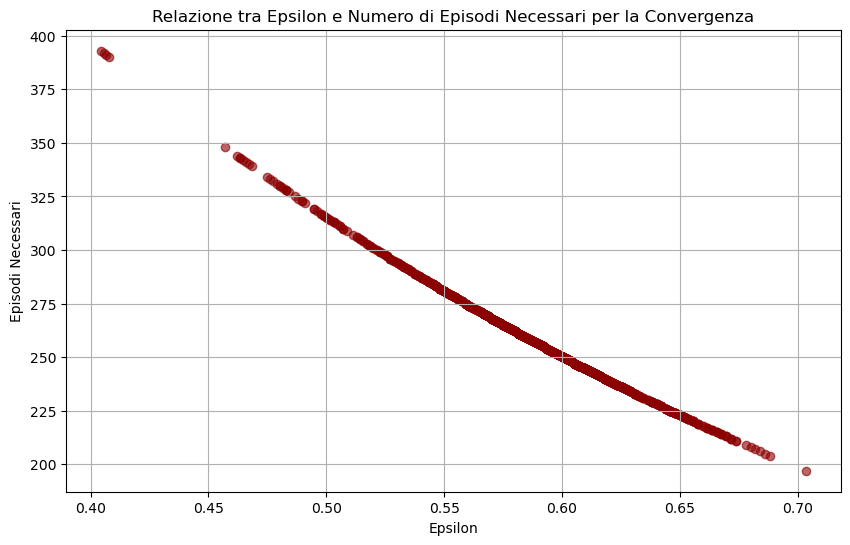

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Supponiamo che il DataFrame 'df' sia già stato creato dal codice precedente
# Grafico di dispersione tra epsilon e numero di episodi necessari per la convergenza
plt.figure(figsize=(10, 6))
plt.scatter(df['Epsilon at Convergence'], df['Episodes to Convergence'], color='darkred', alpha=0.6)
plt.title('Relazione tra Epsilon e Numero di Episodi Necessari per la Convergenza')
plt.xlabel('Epsilon')
plt.ylabel('Episodi Necessari')
plt.grid(True)
plt.show()


In [18]:
def plot_rewards(rewards, title, save_path):
    x = np.arange(len(rewards))
    plt.figure(figsize=(10, 6))
    plt.plot(x, rewards, label='Monte Carlo')
    plt.title(title)
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    plt.legend()
    plt.savefig(save_path)
    plt.show()

def plot_epsilon_decay(total_train_episodes, min_epsilon, save_path):
    episodes = np.arange(total_train_episodes)
    epsilon_values = [decay_function(episode, total_train_episodes, min_epsilon) for episode in episodes]
    plt.figure(figsize=(10, 6))
    plt.plot(episodes, epsilon_values, label='Epsilon Decay')
    plt.title('Epsilon Decay Over Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Epsilon')
    plt.legend()
    plt.savefig(save_path)
    plt.show()

def plot_variance_history(variance_history, save_path):
    mean_variance_over_episodes = np.mean(variance_history, axis=(1, 2))  # Media della varianza su tutte le celle
    plt.figure(figsize=(10, 6))
    plt.plot(mean_variance_over_episodes)
    plt.title('Mean Q-Table Variance Over Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Variance')
    plt.savefig(save_path)
    plt.show()

def plot_convergence_times(convergence_times, save_path):
    plt.figure(figsize=(10, 6))
    plt.hist(convergence_times, bins=20, edgecolor='black')
    plt.title('Histogram of Convergence Times')
    plt.xlabel('Episodes to Converge')
    plt.ylabel('Frequency')
    plt.savefig(save_path)
    plt.show()

def plot_action_distribution(q_table, env, save_path):
    num_states = q_table.shape[0]
    num_actions = q_table.shape[1]
    action_counts = np.zeros((num_states, num_actions))
    
    for state in range(num_states):
        best_action = np.argmax(q_table[state])
        action_counts[state, best_action] += 1

    plt.figure(figsize=(12, 8))
    plt.imshow(action_counts, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Action Distribution Heatmap')
    plt.xlabel('Actions')
    plt.ylabel('States')
    plt.savefig(save_path)
    plt.show()

def plot_final_rewards(final_rewards, save_path):
    plt.figure(figsize=(10, 6))
    plt.boxplot(final_rewards)
    plt.title('Distribution of Final Rewards')
    plt.xlabel('Experiments')
    plt.ylabel('Final Reward')
    plt.savefig(save_path)
    plt.show()

def plot_q_values_over_time(q_table_history, save_path):
    max_q_values = [np.max(q_table) for q_table in q_table_history]
    min_q_values = [np.min(q_table) for q_table in q_table_history]
    
    plt.figure(figsize=(10, 6))
    plt.plot(max_q_values, label='Max Q-Value')
    plt.plot(min_q_values, label='Min Q-Value')
    plt.title('Max and Min Q-Values Over Time')
    plt.xlabel('Episodes')
    plt.ylabel('Q-Value')
    plt.legend()
    plt.savefig(save_path)
    plt.show()


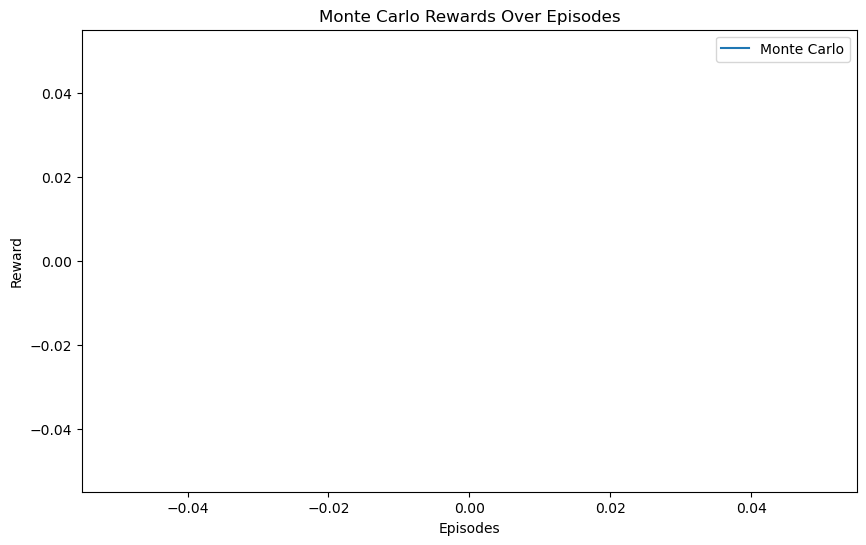

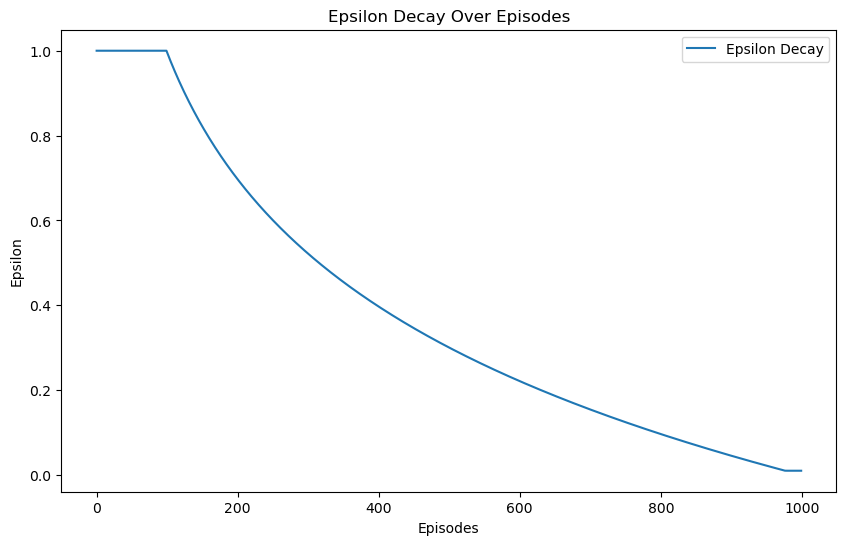

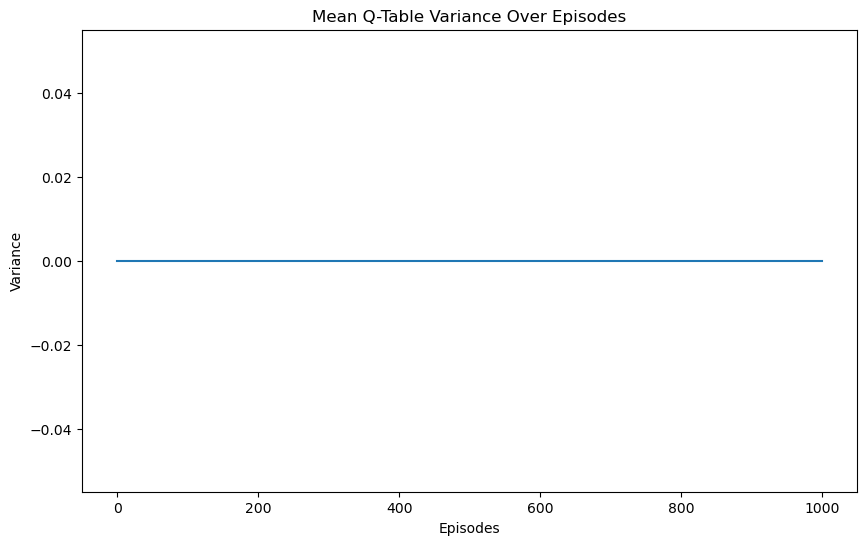

NameError: name 'convergence_times' is not defined

In [20]:
"""# Salva e traccia i grafici
    # Calcola media delle ricompense
MC_mean_rewards = np.mean(MC_rewards, axis=0)
plot_rewards(MC_mean_rewards, 'Monte Carlo Rewards Over Episodes', 'ON/imgs/results_MC_ON_TAB_rw.png')
plot_epsilon_decay(total_train_episodes, min_epsilon, 'ON/imgs/epsilon_decay.png')
plot_variance_history(variance_history / n_times, 'ON/imgs/q_table_variance_over_time.png')
plot_convergence_times(convergence_times, 'ON/imgs/convergence_times.png')
plot_action_distribution(np.mean(MC_tables, axis=0), env, 'ON/imgs/action_distribution.png')
plot_final_rewards(MC_rewards, 'ON/imgs/final_rewards.png')
plot_q_values_over_time(q_table_history, 'ON/imgs/q_values_over_time.png')"""